<a href="https://colab.research.google.com/github/JairusTheAnalyst/JairusTheAnalyst/blob/main/Mini_Project_Predicting_Malaria_Diagnosis_using_SGDAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Predicting Malaria Diagnosis using SGDAssignment
              Jairus Otana Mulongo
              ST61/80173/2024


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


In [2]:
df = pd.read_csv("/content/drive/MyDrive/DATASETS/malaria_data (1).csv")
df.head()


,Age,Temperature,Headache,Vomiting,Fatigue,RBC_Count,WBC_Count,Malaria
0,52,37.590965,1,0,1,4.274124,4.686682,1
1,15,36.687406,1,1,0,4.324417,6.157237,0
2,72,38.670144,1,0,0,5.429736,7.905766,0
3,61,37.323531,0,0,0,4.889361,8.454430,0
4,21,36.509403,0,0,0,4.819121,6.701856,0


In [3]:
df.isnull().sum()

,0
Age,0
Temperature,0
Headache,0
Vomiting,0
Fatigue,0
RBC_Count,0
WBC_Count,0
Malaria,0


In [4]:
df.describe()

,Age,Temperature,Headache,Vomiting,Fatigue,RBC_Count,WBC_Count,Malaria
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,38.474000,37.480828,0.510000,0.500000,0.516000,4.545089,5.990690,0.438000
std,22.360799,1.189464,0.500401,0.500501,0.500244,0.683605,1.088100,0.496638
min,1.000000,34.263736,0.000000,0.000000,0.000000,2.455055,2.678537,0.000000
25%,19.000000,36.655838,0.000000,0.000000,0.000000,4.093187,5.285511,0.000000
50%,37.500000,37.460731,1.000000,0.500000,1.000000,4.514904,6.000953,0.000000
75%,58.250000,38.250287,1.000000,1.000000,1.000000,5.014759,6.722411,1.000000
max,79.000000,41.194657,1.000000,1.000000,1.000000,6.735175,9.451523,1.000000


Split Features aand Target

In [5]:
X = df.drop("Malaria", axis=1)    # predictor features
y = df["Malaria"]                 # target: 0 or 1


Feature Scaling

Using StandardScaler:

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Train-Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


**Logistic Regression Using SGD**



**Sigmoid Function**

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


**Loss Function (Binary Cross-Entropy)**

In [9]:
def compute_loss(y, y_pred):
    return -np.mean(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))


**SGD Training Loop**

In [10]:
def train_sgd(X, y, lr=0.01, epochs=50):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    losses = []

    for epoch in range(epochs):
        for i in range(n_samples):               # stochastic update
            xi = X[i]
            yi = y.iloc[i]

            # prediction
            linear = np.dot(xi, weights) + bias
            y_pred = sigmoid(linear)

            # gradients
            dw = (y_pred - yi) * xi
            db = (y_pred - yi)

            # update
            weights -= lr * dw
            bias -= lr * db

        # track loss per epoch
        y_pred_all = sigmoid(np.dot(X, weights) + bias)
        loss = compute_loss(y, y_pred_all)
        losses.append(loss)

        print(f"Epoch {epoch+1}/{epochs} - Loss: {loss:.4f}")

    return weights, bias, losses


**Train Model**

In [11]:
weights, bias, losses = train_sgd(X_train, y_train, lr=0.01, epochs=50)


Epoch 1/50 - Loss: 0.3927
Epoch 2/50 - Loss: 0.3220
Epoch 3/50 - Loss: 0.2902
Epoch 4/50 - Loss: 0.2720
Epoch 5/50 - Loss: 0.2601
Epoch 6/50 - Loss: 0.2517
Epoch 7/50 - Loss: 0.2456
Epoch 8/50 - Loss: 0.2408
Epoch 9/50 - Loss: 0.2371
Epoch 10/50 - Loss: 0.2342
Epoch 11/50 - Loss: 0.2317
Epoch 12/50 - Loss: 0.2297
Epoch 13/50 - Loss: 0.2280
Epoch 14/50 - Loss: 0.2266
Epoch 15/50 - Loss: 0.2254
Epoch 16/50 - Loss: 0.2243
Epoch 17/50 - Loss: 0.2234
Epoch 18/50 - Loss: 0.2226
Epoch 19/50 - Loss: 0.2219
Epoch 20/50 - Loss: 0.2213
Epoch 21/50 - Loss: 0.2208
Epoch 22/50 - Loss: 0.2203
Epoch 23/50 - Loss: 0.2199
Epoch 24/50 - Loss: 0.2195
Epoch 25/50 - Loss: 0.2192
Epoch 26/50 - Loss: 0.2189
Epoch 27/50 - Loss: 0.2186
Epoch 28/50 - Loss: 0.2183
Epoch 29/50 - Loss: 0.2181
Epoch 30/50 - Loss: 0.2179
Epoch 31/50 - Loss: 0.2177
Epoch 32/50 - Loss: 0.2176
Epoch 33/50 - Loss: 0.2174
Epoch 34/50 - Loss: 0.2173
Epoch 35/50 - Loss: 0.2172
Epoch 36/50 - Loss: 0.2171
Epoch 37/50 - Loss: 0.2170
Epoch 38/5

The model was trained for 50 epochs using Logistic Regression with Stochastic Gradient Descent (SGD).
The loss consistently decreased from 0.3927 → 0.2162, showing stable convergence.

 **Evaluate the Model**

 Predictions

In [12]:
y_pred_prob = sigmoid(np.dot(X_test, weights) + bias)
y_pred = (y_pred_prob >= 0.5).astype(int)


In [13]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.91
Precision: 0.875
Recall: 0.9333333333333333
F1 Score: 0.9032258064516129


High accuracy (91%) indicates that the model correctly classifies most malaria cases.

High recall (93%) means the model is very good at identifying malaria-positive individuals (important in health diagnosis to reduce false negatives).

Precision (87.5%) shows that most of the positive predictions are correct.

F1-score (0.90) confirms a good balance between precision and recall.

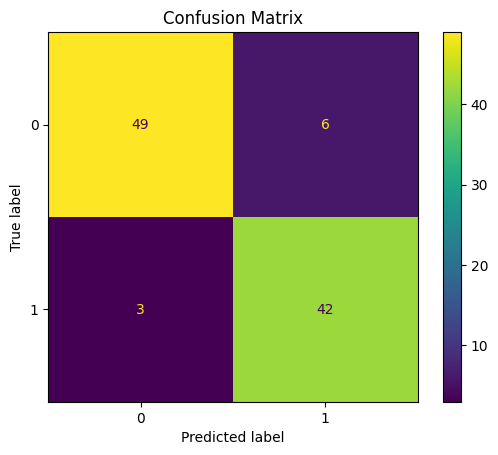

In [14]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()


**Visualizations**
**Loss Curve**

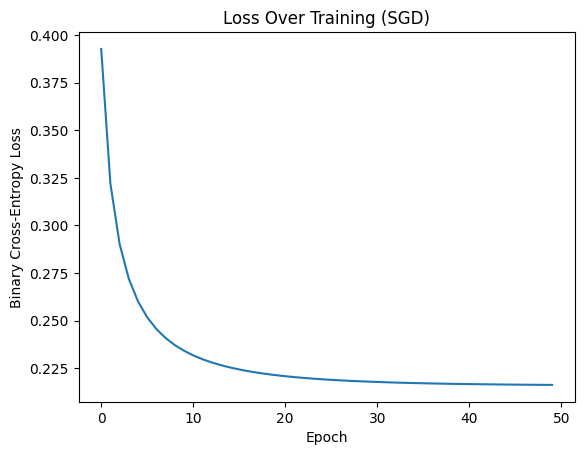

In [15]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Loss Over Training (SGD)")
plt.show()


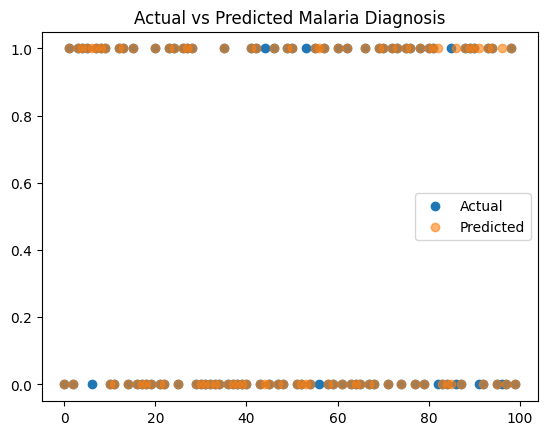

In [16]:
plt.scatter(range(len(y_test)), y_test, label="Actual")
plt.scatter(range(len(y_pred)), y_pred, label="Predicted", alpha=0.6)
plt.legend()
plt.title("Actual vs Predicted Malaria Diagnosis")
plt.show()


The Logistic Regression model optimized with SGD performs well for binary malaria prediction.
The decreasing loss curve and strong classification metrics indicate effective learning and good generalization.